# Olympic Games Dataset Analysis

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__).

In [590]:
import numpy as np
import scipy.stats as stats

In [591]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [592]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 20

In [593]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [594]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [595]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [596]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [597]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [598]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.00,594.32
1,Albania,ALB,2889167.00,3945.22
2,Algeria,ALG,39666519.00,4206.03
3,American Samoa*,ASA,55538.00,NaN
4,Andorra,AND,70473.00,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.00,2111.14
197,Virgin Islands*,ISV,103574.00,NaN
198,Yemen,YEM,26832215.00,1406.29
199,Zambia,ZAM,16211767.00,1304.88


In [599]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [600]:
olympics = pd.concat([summer, winter],axis = 0, keys = ['Summer', 'Winter'],
                     names = ['Edition']).reset_index().drop('level_1', axis =1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [601]:
olympics = olympics.merge(dic.iloc[:,:2], how = 'left', left_on= 'Country',  right_on = 'Code').drop('Code', axis =1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


## Data Cleaning (Part 1)

1. Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names.

In [602]:
olympics.rename({'GDP per Capita': 'GDP_per_Capita','Country_x': 'Code', 'Country_y': 'Country_name'},
                axis = 1, inplace = True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [603]:
missing_names = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [604]:
missing_names = pd.Series(data = missing_names)
missing_names

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
dtype: object

In [605]:
olympics.loc[olympics.Country_name.isna(), 'Code'].map(missing_names)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [606]:
olympics.Country_name.fillna(value = olympics.Code.map(missing_names), inplace = True)

## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [607]:
olympics.loc[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [608]:
olympics.dropna(subset = ['Code'], inplace = True)
olympics.reset_index(drop = True, inplace = True)

In [609]:
olympics.Medal = olympics.Medal.astype('category')

In [610]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Edition       36931 non-null  object  
 1   Year          36931 non-null  int64   
 2   City          36931 non-null  object  
 3   Sport         36931 non-null  object  
 4   Discipline    36931 non-null  object  
 5   Athlete       36931 non-null  object  
 6   Code          36931 non-null  object  
 7   Gender        36931 non-null  object  
 8   Event         36931 non-null  object  
 9   Medal         36931 non-null  category
 10  Country_name  36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [611]:
olympics.Medal.unique()

['Gold', 'Silver', 'Bronze']
Categories (3, object): ['Gold', 'Silver', 'Bronze']

In [612]:
olympics.Medal.cat.set_categories(['Bronze', 'Silver', 'Gold'], ordered = True, inplace = True)

## What are the most successful countries of all times?

1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [613]:
top_10 = olympics.Country_name.value_counts().head(10)

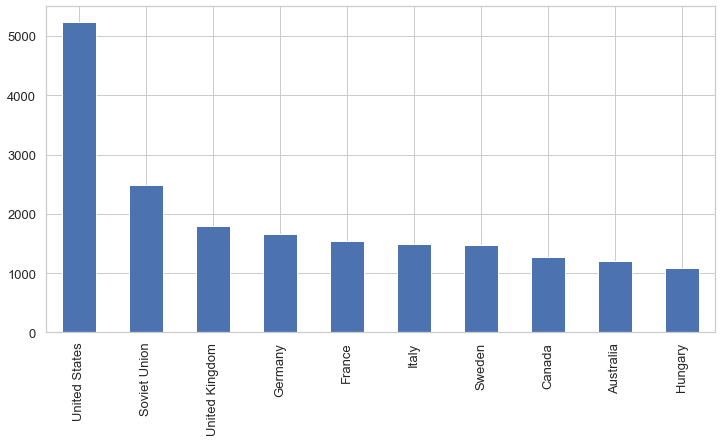

In [614]:
top_10.plot(kind = 'bar', figsize = (12,6), fontsize = 13)
plt.show()

In [615]:
olympics.loc[top_10]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
5238,Summer,1928,Amsterdam,Cycling,Cycling Track,"GRAY, Edgar Laurence",AUS,Men,1KM Time Trial,Bronze,Australia
2489,Summer,1912,Stockholm,Rowing,Rowing,"DAHLBÄCK, Herman",SWE,Men,Coxed Fours Jugriggers,Silver,Sweden
1799,Summer,1908,London,Shooting,Shooting,"WESTOVER, Arthur W.",CAN,Men,"Clay Pigeons, Team",Silver,Canada
1665,Summer,1908,London,Rugby,Rugby,"JACKETT, Edward John",GBR,Men,Rugby,Silver,United Kingdom
1548,Summer,1908,London,Lacrosse,Lacrosse,"MCKERROW, Clarence D.",CAN,Men,Lacrosse,Gold,Canada
1488,Summer,1908,London,Gymnastics,Artistic G.,"ENGEBRETSEN, Eugene",NOR,Men,Team Competition,Silver,Norway
1477,Summer,1908,London,Gymnastics,Artistic G.,"WIDELL, F.",SWE,Men,Team Competition,Gold,Sweden
1274,Summer,1908,London,Athletics,Athletics,"JACOBS, Charles Sherman",USA,Men,Pole Vault,Bronze,United States
1204,Summer,1908,London,Athletics,Athletics,"CLOUGHEN, Robert",USA,Men,200M,Silver,United States
1091,Summer,1904,St Louis,Tug of War,Tug of War,"FRIDE, H.",USA,Men,Tug Of War,Bronze,United States


In [616]:
olympics_10 = olympics[olympics.Country_name.isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country_name
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


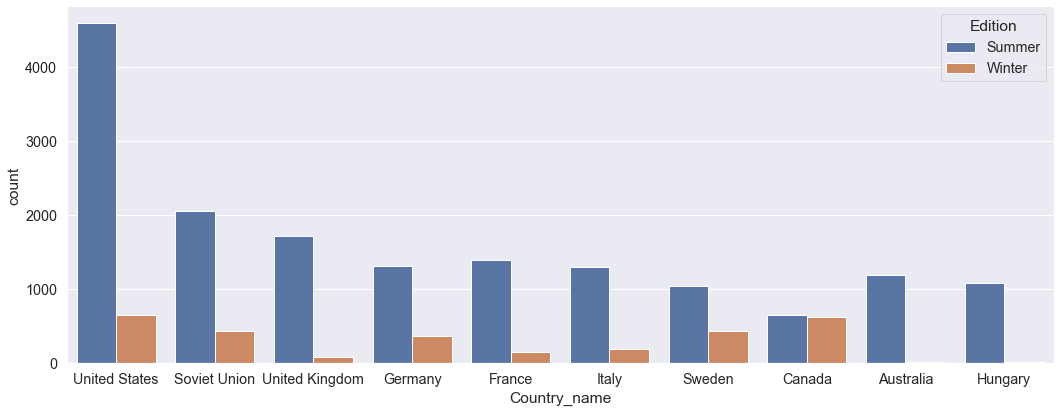

In [659]:
plt.figure(figsize = (15,6))
sns.countplot(data = olympics_10, x = 'Country_name', order = top_10.index, hue = 'Edition')
plt.tight_layout()
plt.show()

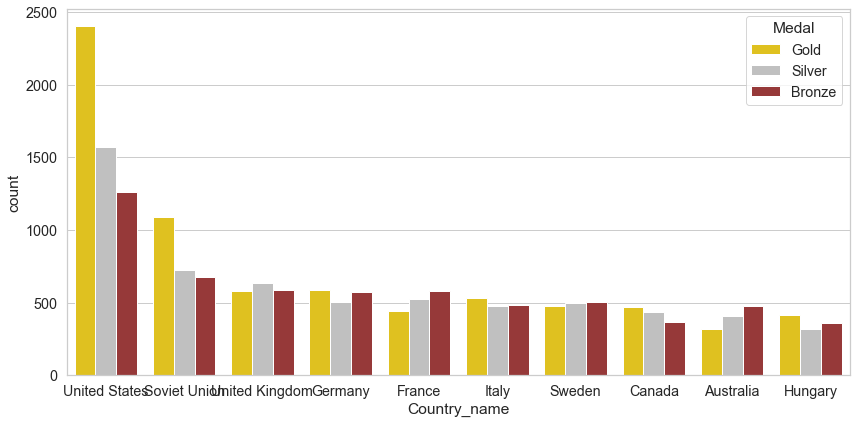

In [618]:
plt.figure(figsize = (12,6))
sns.countplot(data = olympics_10, x = 'Country_name',
              order = top_10.index, hue = 'Medal',
              hue_order = ['Gold', 'Silver', 'Bronze' ],
              palette = ['Gold', 'Silver', 'Brown'])
plt.tight_layout()
plt.show()

## Do GDP, Population and Politics matter?

1. Create the  __aggregated and merged__ DataFrame with __Top 50 Countries__. The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

In [619]:
top_50 = pd.crosstab(index = olympics.Country_name, columns = olympics.Medal, margins = True, margins_name = 'Total')
top_50.drop('Total', axis = 0, inplace = True)
top_50 = top_50.sort_values(by = 'Total', ascending = False)
top_50 = top_50.merge(dic,how = 'left', left_index = True, right_on = 'Country').set_index('Country').head(50)
top_50.drop('Code', axis = 1, inplace = True)
top_50.head()

,Bronze,Silver,Gold,Total,Population,GDP per Capita
Country,,,,,,
United States,1265,1571,2402,5238,321418820.00,56115.72
Soviet Union,677,724,1088,2489,NaN,NaN
United Kingdom,587,632,580,1799,65138232.00,43875.97
Germany,572,504,589,1665,81413145.00,41313.31
France,578,526,444,1548,66808385.00,36205.57


In [620]:
olympics['Games'] = olympics.apply(lambda x: x.City + ' ' + str(x.Year), axis = 1)
olympics['Games']

0        Athens 1896
1        Athens 1896
2        Athens 1896
3        Athens 1896
4        Athens 1896
            ...     
36926     Sochi 2014
36927     Sochi 2014
36928     Sochi 2014
36929     Sochi 2014
36930     Sochi 2014
Name: Games, Length: 36931, dtype: object

In [621]:
top_50['Total_Games'] = olympics.groupby('Country_name').agg({'Games': 'nunique'})
top_50.head()

,Bronze,Silver,Gold,Total,Population,GDP per Capita,Total_Games
Country,,,,,,,
United States,1265,1571,2402,5238,321418820.00,56115.72,48
Soviet Union,677,724,1088,2489,NaN,NaN,18
United Kingdom,587,632,580,1799,65138232.00,43875.97,42
Germany,572,504,589,1665,81413145.00,41313.31,25
France,578,526,444,1548,66808385.00,36205.57,47


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable. Ranks are more meaningful than absolute numbers.

In [622]:
ranking = top_50.rank(ascending = False)
ranking.head()

,Bronze,Silver,Gold,Total,Population,GDP per Capita,Total_Games
Country,,,,,,,
United States,1.00,1.00,1.00,1.00,3.00,4.00,1.00
Soviet Union,2.00,2.00,2.00,2.00,NaN,NaN,28.00
United Kingdom,3.00,3.00,4.00,3.00,14.00,8.00,10.00
Germany,5.00,5.00,3.00,4.00,10.00,12.00,19.00
France,4.00,4.00,8.00,5.00,13.00,15.00,3.00


## Statistical Analysis and Hypothesis Testing with scipy

Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [623]:
top_50.drop(['Bronze', 'Silver', 'Gold'], axis = 1, inplace = True)

In [624]:
top_50.corr(method = 'pearson')

,Total,Population,GDP per Capita,Total_Games
Total,1.00,0.08,0.51,0.56
Population,0.08,1.00,-0.25,-0.15
GDP per Capita,0.51,-0.25,1.00,0.82
Total_Games,0.56,-0.15,0.82,1.00


In [625]:
top_50.corr(method = 'spearman')

,Total,Population,GDP per Capita,Total_Games
Total,1.00,0.09,0.67,0.68
Population,0.09,1.00,-0.30,-0.10
GDP per Capita,0.67,-0.30,1.00,0.81
Total_Games,0.68,-0.10,0.81,1.00


In [626]:
top_50.rank(ascending = True).corr(method = 'pearson')

,Total,Population,GDP per Capita,Total_Games
Total,1.00,0.09,0.67,0.68
Population,0.09,1.00,-0.30,-0.10
GDP per Capita,0.67,-0.30,1.00,0.80
Total_Games,0.68,-0.10,0.80,1.00


In [627]:
stats.spearmanr(a = top_50['GDP per Capita'], b = top_50.Total, nan_policy = 'omit')

SpearmanrResult(correlation=0.6679153261689105, pvalue=1.8337033831048764e-06)

In [628]:
stats.spearmanr(a = top_50.Total_Games, b = top_50.Total, nan_policy = 'omit')

SpearmanrResult(correlation=0.6818689415046658, pvalue=4.982151209468708e-08)

In [629]:
stats.spearmanr(a = top_50.Population, b = top_50.Total, nan_policy = 'omit')

SpearmanrResult(correlation=0.09046288631091884, pvalue=0.5640004141819381)

## Aggregating and Ranking

In [630]:
edition_olympics = pd.crosstab(index = olympics.Country_name, columns = olympics.Edition)
edition_olympics

Edition,Summer,Winter
Country_name,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [631]:
gender_olympics = pd.crosstab(index = olympics.Country_name, columns = olympics.Gender)
gender_olympics

Gender,Men,Women
Country_name,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [632]:
medals = pd.concat([edition_olympics, gender_olympics], axis = 1)
medals

,Summer,Winter,Men,Women
Country_name,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [633]:
medals['Total'] = medals.Summer + medals.Winter
medals.sort_values('Total', ascending = False, inplace = True)
medals

,Summer,Winter,Men,Women,Total
Country_name,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [634]:
ranks_50 = medals.rank(ascending = False, method = 'average').head(50)

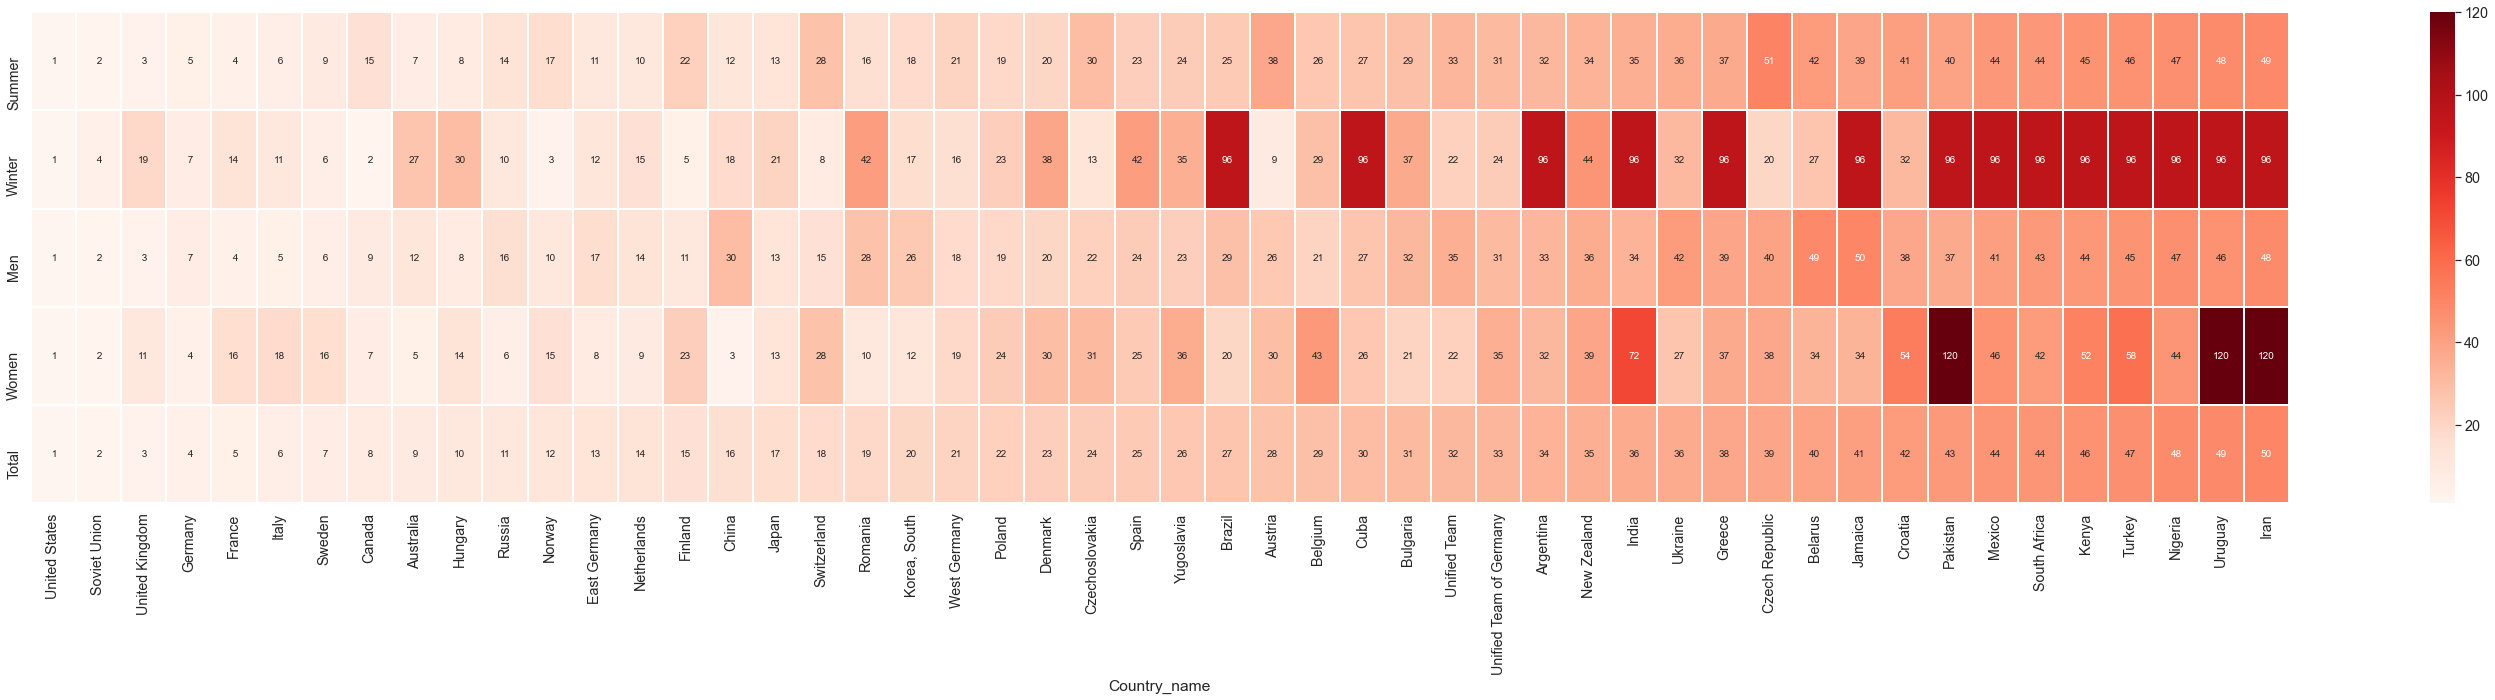

In [635]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


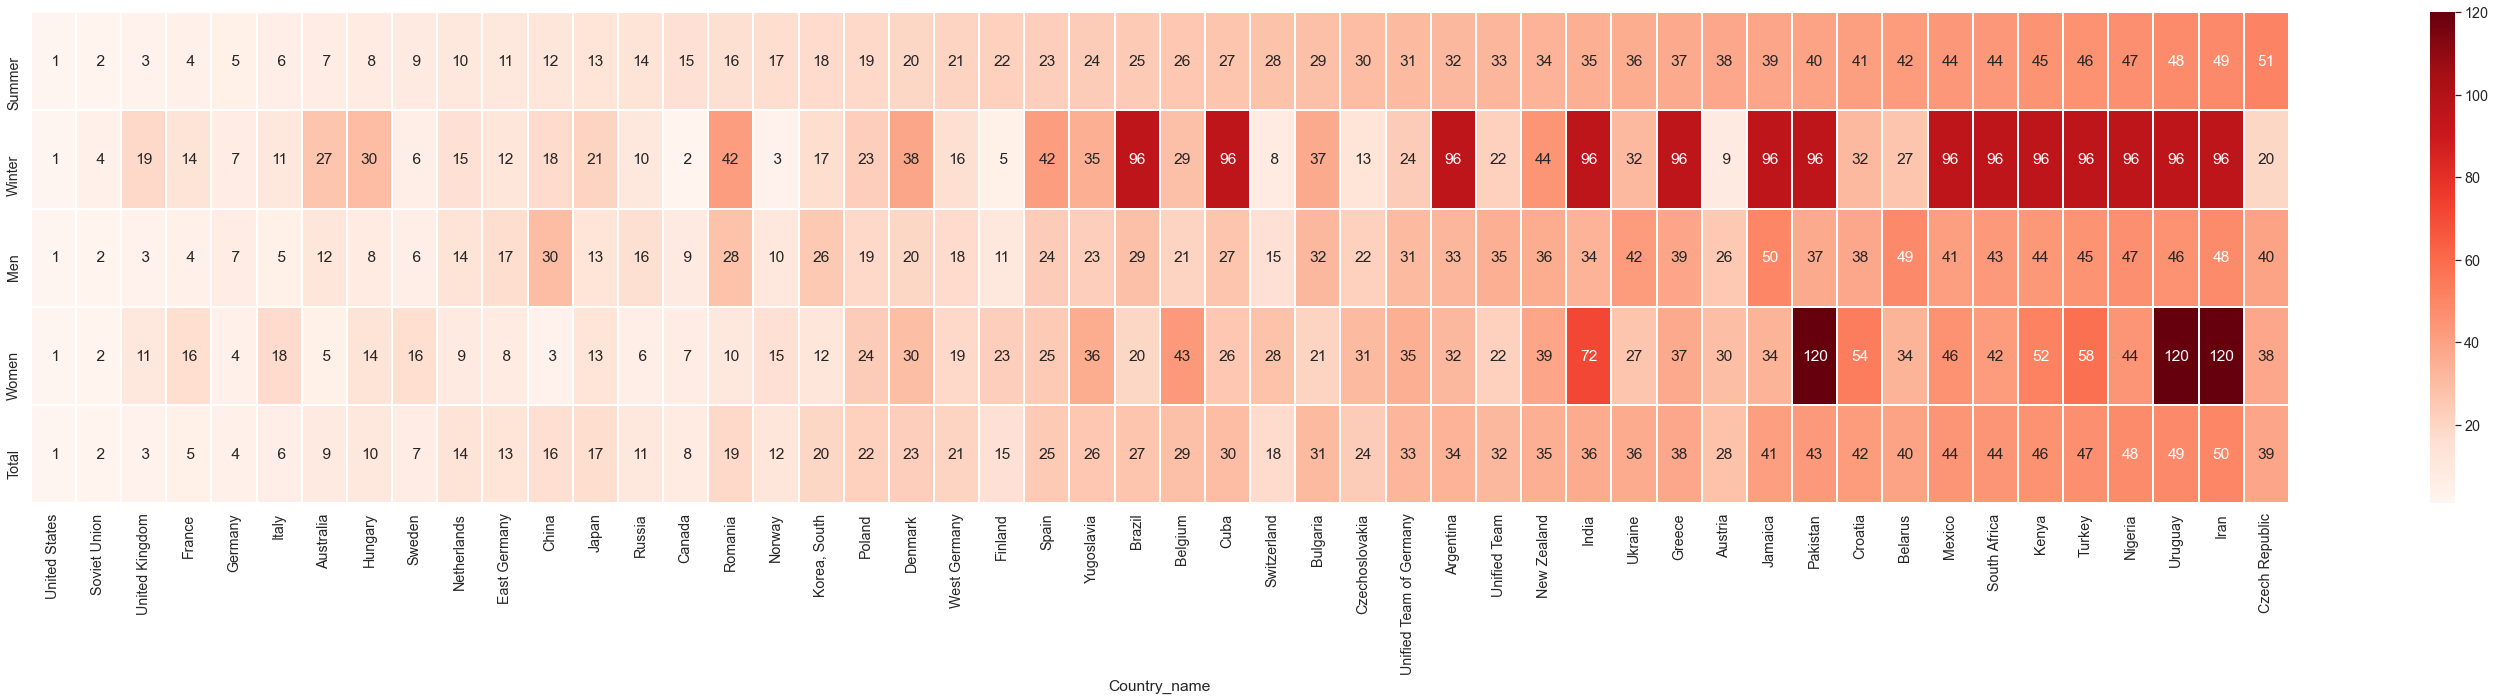

In [636]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.sort_values(by = 'Summer').T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

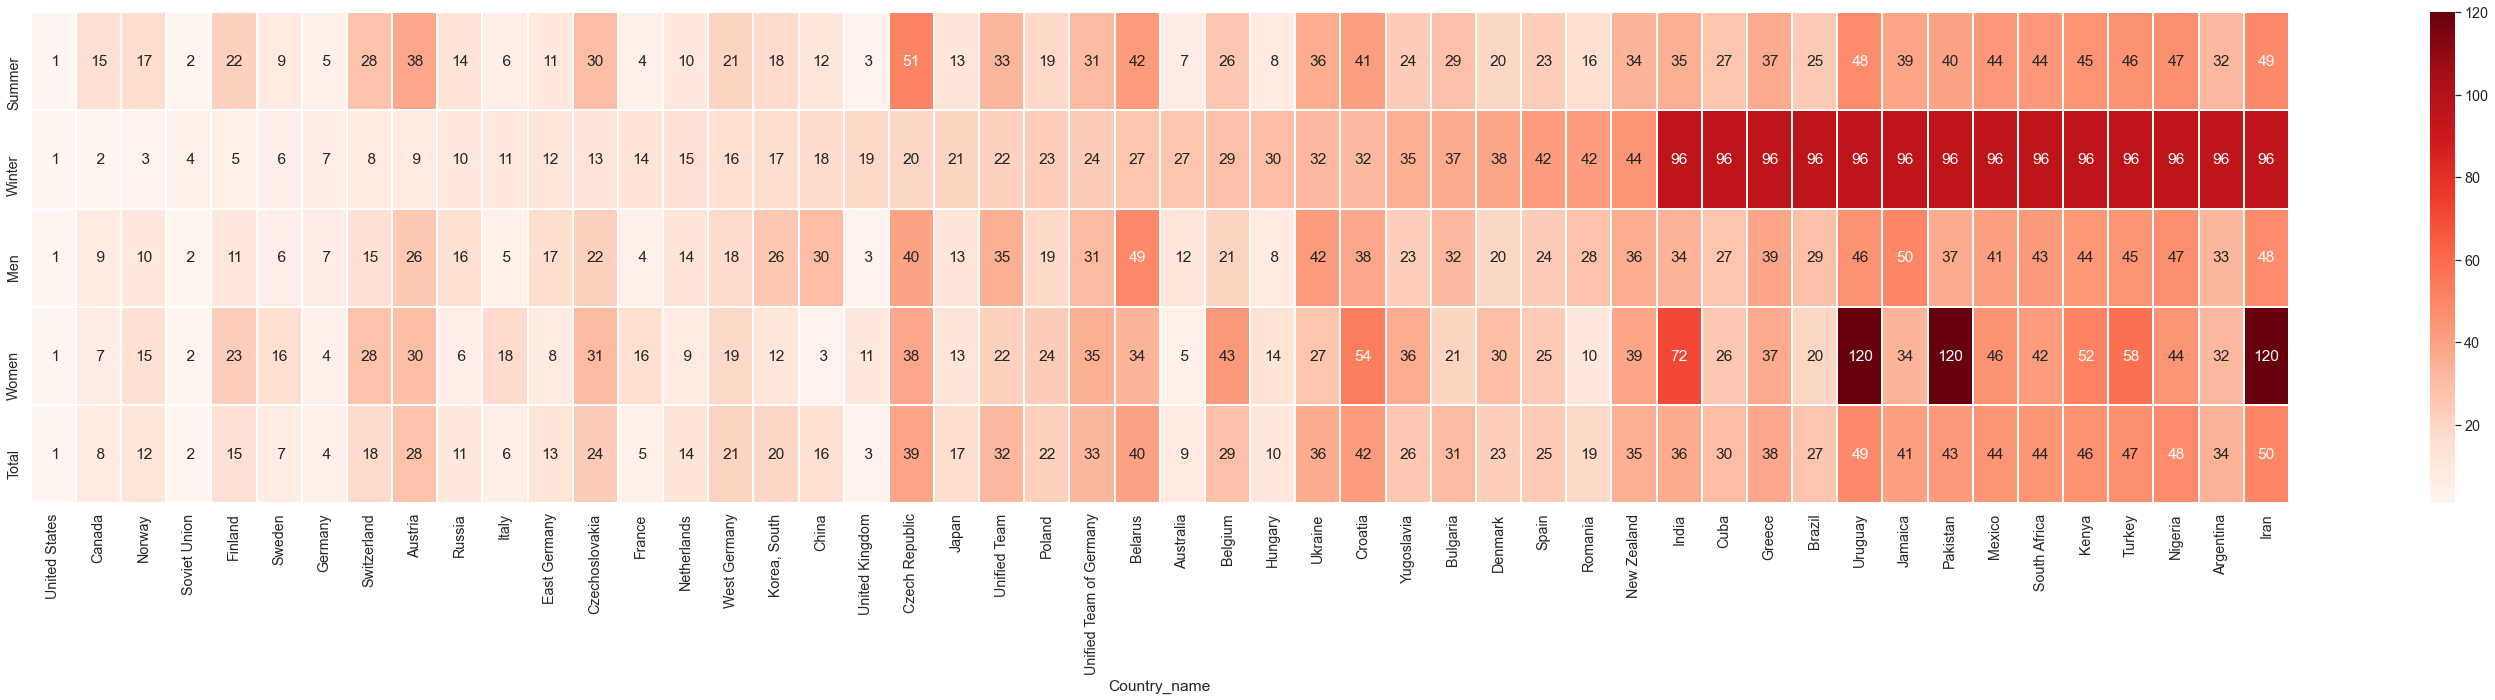

In [637]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.sort_values(by = 'Winter').T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

In [638]:
rankd_diff = ranks_50.Summer.sub(ranks_50.Winter).sort_values().to_frame()

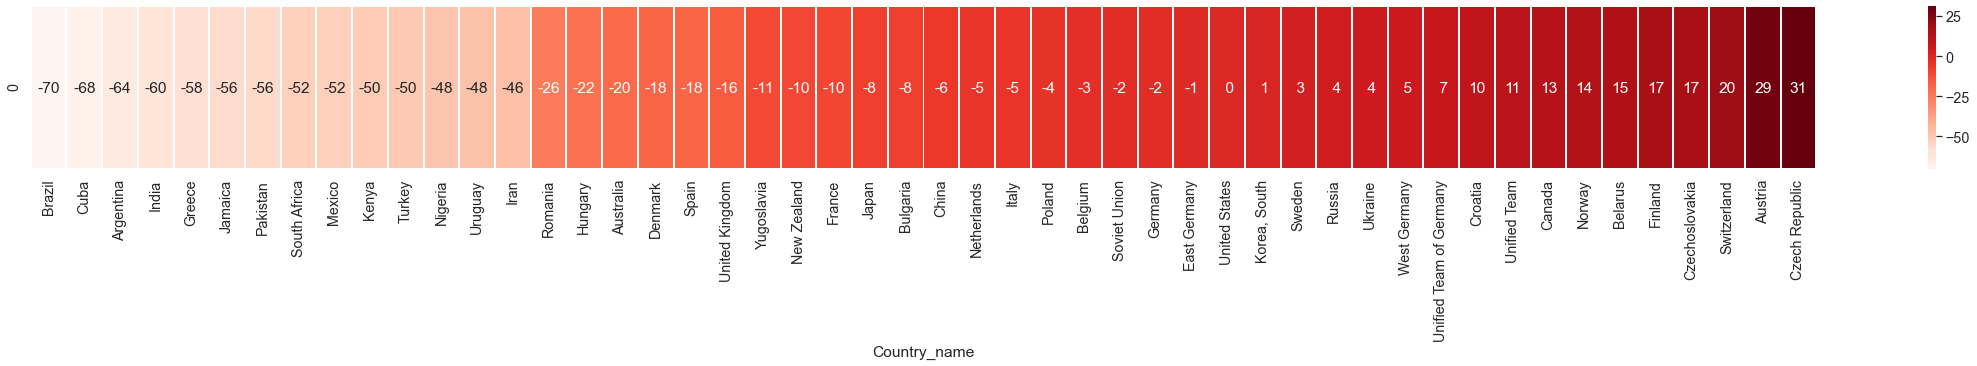

In [639]:
plt.figure(figsize = (40,3))
sns.heatmap(rankd_diff.T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

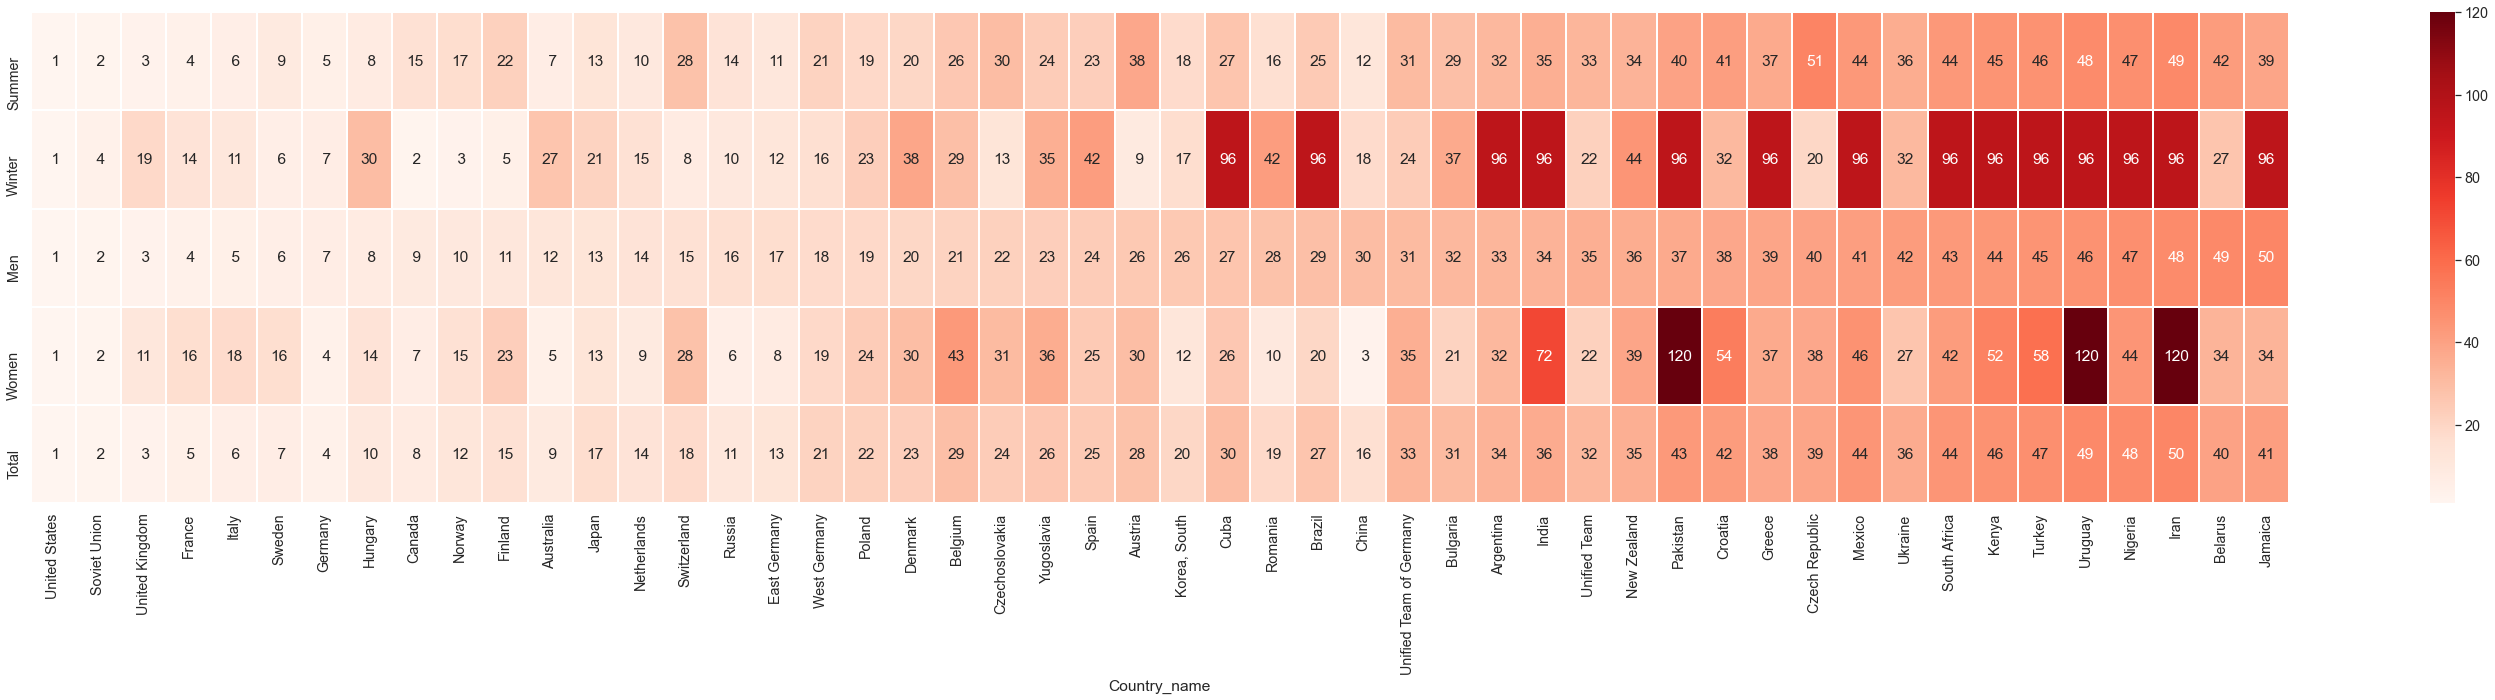

In [640]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.sort_values(by = 'Men').T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

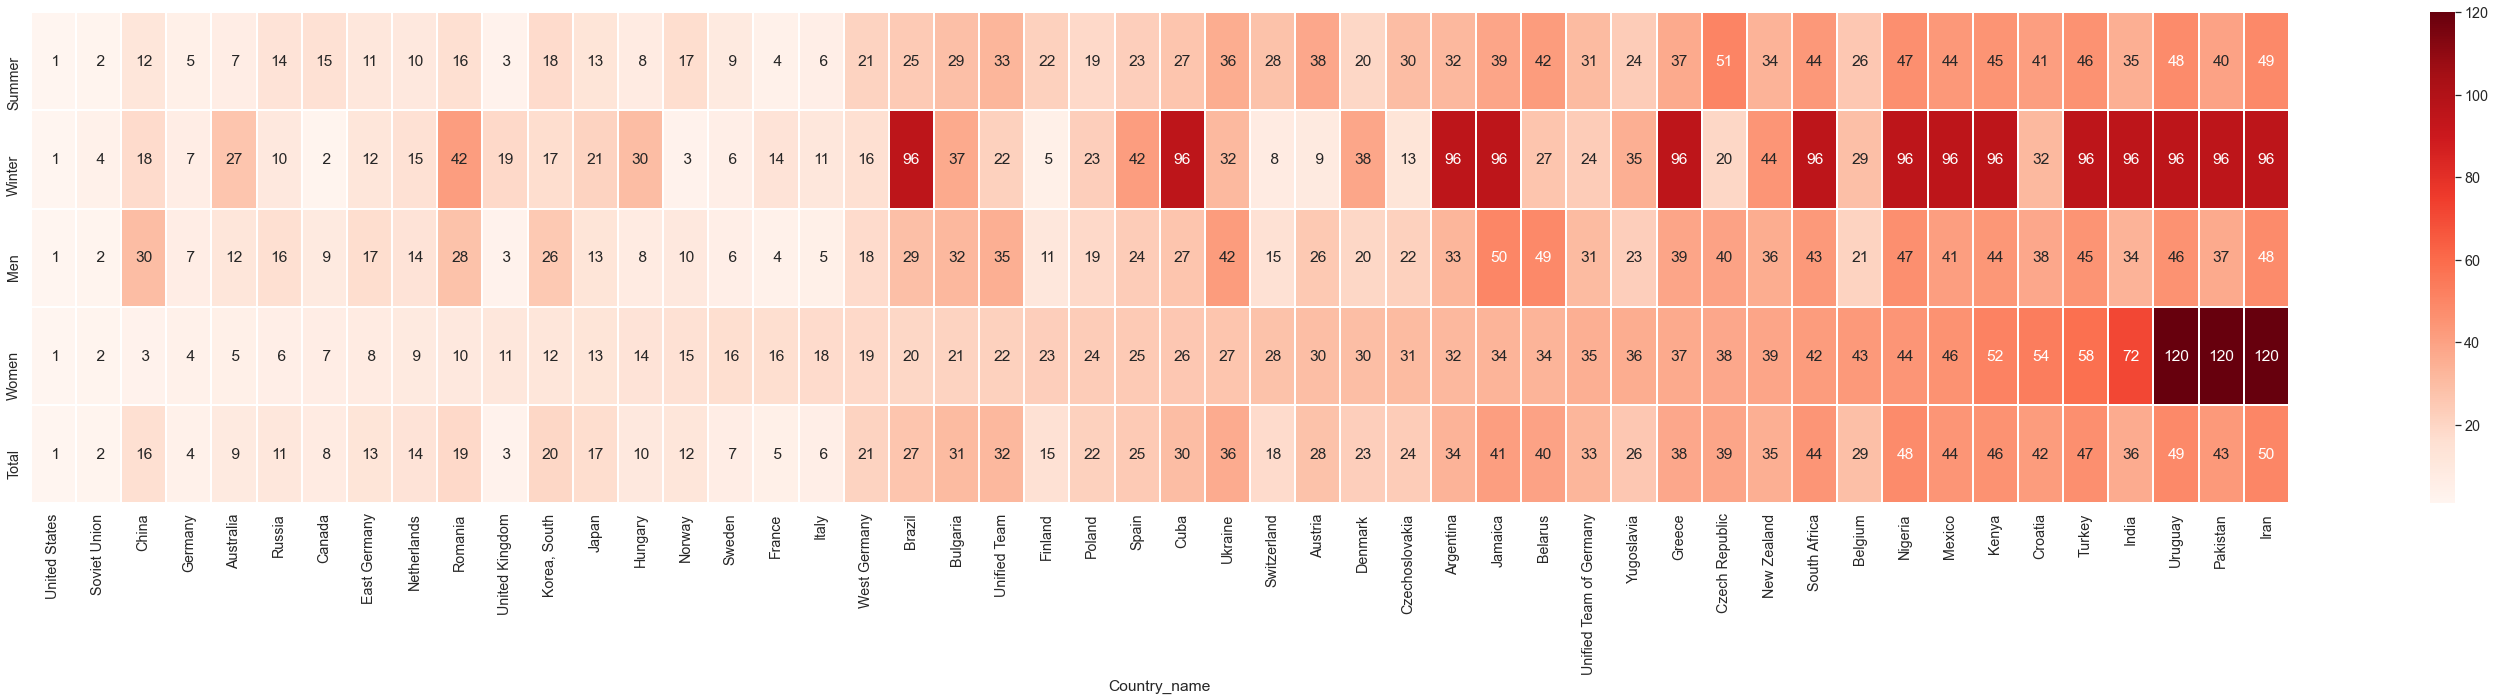

In [641]:
plt.figure(figsize = (40,10))
sns.heatmap(ranks_50.sort_values(by = 'Women').T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()

In [642]:
sex_diff = ranks_50.Men.sub(ranks_50.Women).sort_values().to_frame()

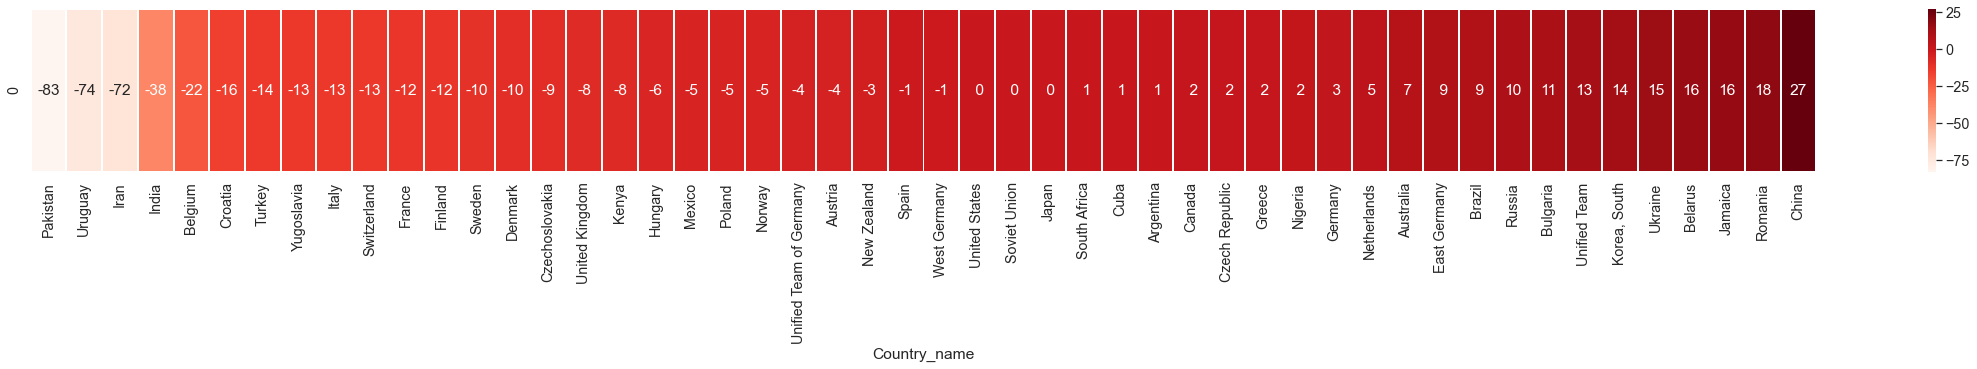

In [643]:
plt.figure(figsize = (40,3))
sns.heatmap(sex_diff.T, annot = True, fmt = '2.0f', cmap = 'Reds', linewidths = 1)
sns.set(font_scale = 1.3)
plt.show()

## Do Traditions matter?

Create __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

In [644]:
sports = olympics.Sport.value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Table Tennis',
       'Badminton', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [645]:
best_countries_20 = olympics.Country_name.value_counts().head(20).index
best_countries_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [646]:
by_sport = pd.crosstab(index = olympics.Country_name, columns = olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [652]:
by_sport = by_sport.rank(ascending = False)

In [657]:
by_sport = by_sport.loc[best_countries_20, sports]
by_sport.head()

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.00,1.00,1.00,2.00,7.00,6.00,2.00,1.00,7.00,1.00,...,3.00,1.00,6.50,11.50,11.00,11.00,11.50,11.00,1.00,2.00
Soviet Union,4.00,3.00,7.00,1.00,4.00,4.00,5.00,2.00,6.00,4.00,...,12.00,12.00,14.00,11.50,11.00,11.00,11.50,11.00,11.00,11.50
United Kingdom,10.50,2.00,2.00,16.00,16.50,11.50,8.00,11.00,4.00,15.00,...,2.00,2.00,4.00,1.50,1.00,11.00,1.00,11.00,11.00,1.00
Germany,5.00,6.00,5.00,14.00,5.00,5.00,9.00,4.50,3.00,9.00,...,12.00,12.00,4.00,11.50,11.00,11.00,11.50,11.00,11.00,11.50
France,14.00,7.00,11.00,15.00,9.00,2.00,15.00,13.00,15.00,16.00,...,12.00,12.00,14.00,1.50,11.00,1.00,2.00,1.00,11.00,11.50


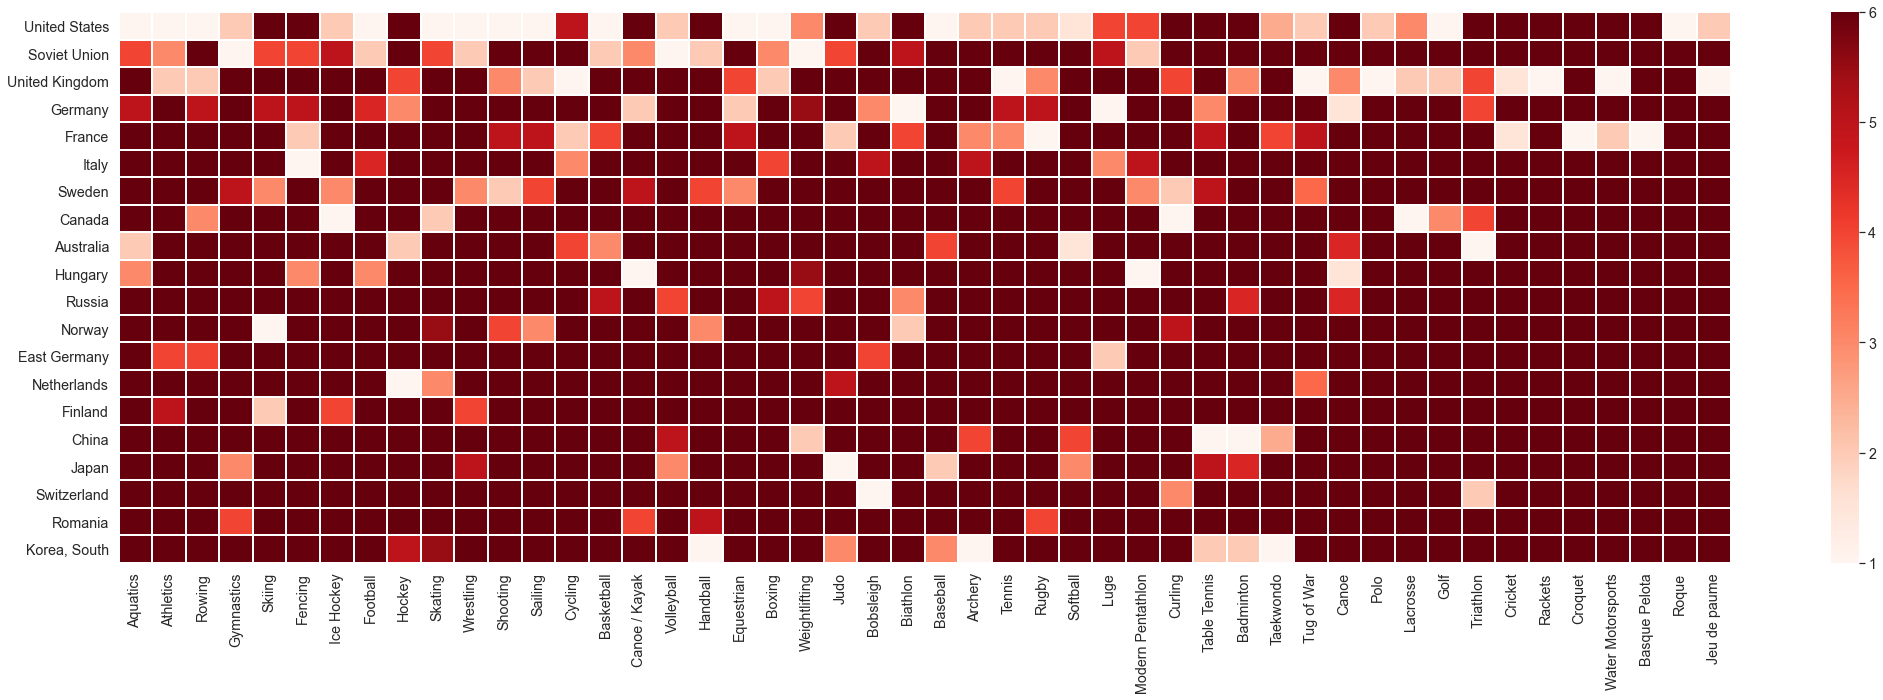

In [658]:
plt.figure(figsize = (30,10))
sns.heatmap(by_sport, cmap = 'Reds', vmin = 1, vmax = 6, linewidth = 1)
sns.set(font_scale = 1.3)
plt.tight_layout()
plt.show()